## Case Study:
**Jamboree** has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### Objective: 
The primary objective is to analyze the dataset to extract valuable insights and to develop a predictive model that estimates an applicant's likelihood of admission based on the provided features.


### Column Profiling:
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv(r"C:\Users\yugendra.salunke\Downloads\Jamboree_Admission.csv")

In [6]:
df.shape

(500, 9)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Column Profiling: 

- Serial No.: This column represents the unique row identifier for each applicant in the
dataset.
- GRE Scores: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.
- TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.
- University Rating: This column indicates the rating or reputation of the university that
the applicants are associated with.
- The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- SOP: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- LOR: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.
- Research: This column indicates whether the applicant has research experience (1) or
not (0).
- Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

### Exploratory Data Analysis

In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
for i in df:
    print(f'Unique values in the {i} column:',df[i].nunique())

Unique values in the Serial No. column: 500
Unique values in the GRE Score column: 49
Unique values in the TOEFL Score column: 29
Unique values in the University Rating column: 5
Unique values in the SOP column: 9
Unique values in the LOR  column: 9
Unique values in the CGPA column: 184
Unique values in the Research column: 2
Unique values in the Chance of Admit  column: 61


In [14]:
df.duplicated().sum()

0

In [15]:
df.drop(columns="Serial No.", inplace= True)

In [16]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


### Univariate Analysis:

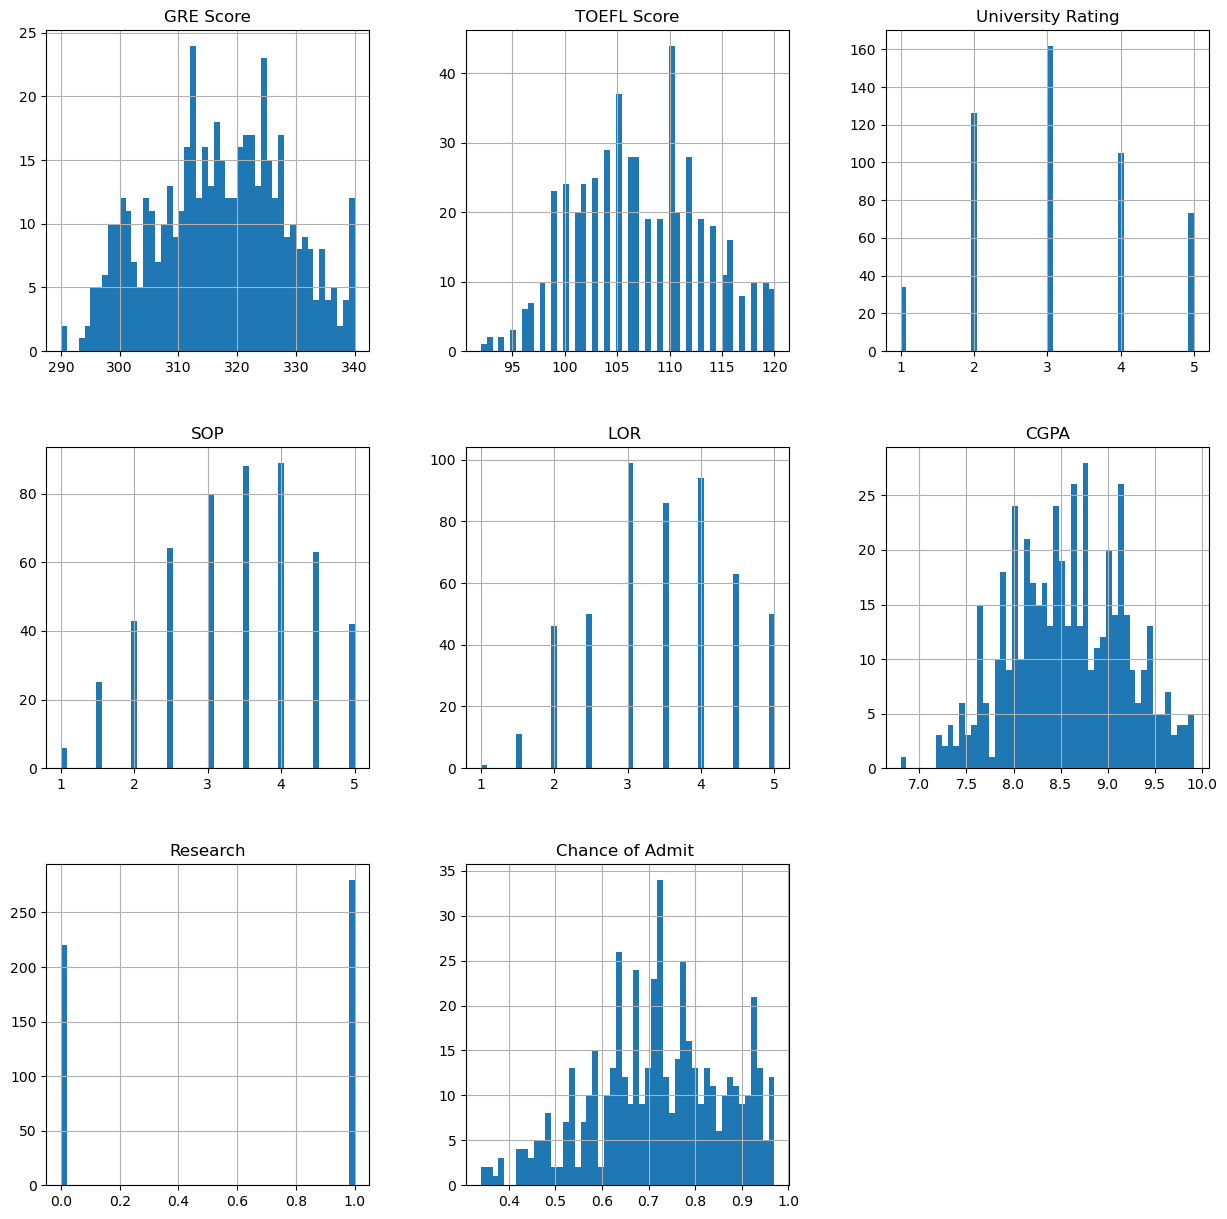

In [18]:
df.hist(figsize=(15,15),bins=50)
plt.show()

In [19]:
df.rename(columns={'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score',
            'University Rating':'University_rating','LOR ':'LOR',
            'Chance of Admit ':'Chance_of_admit'},inplace=True)

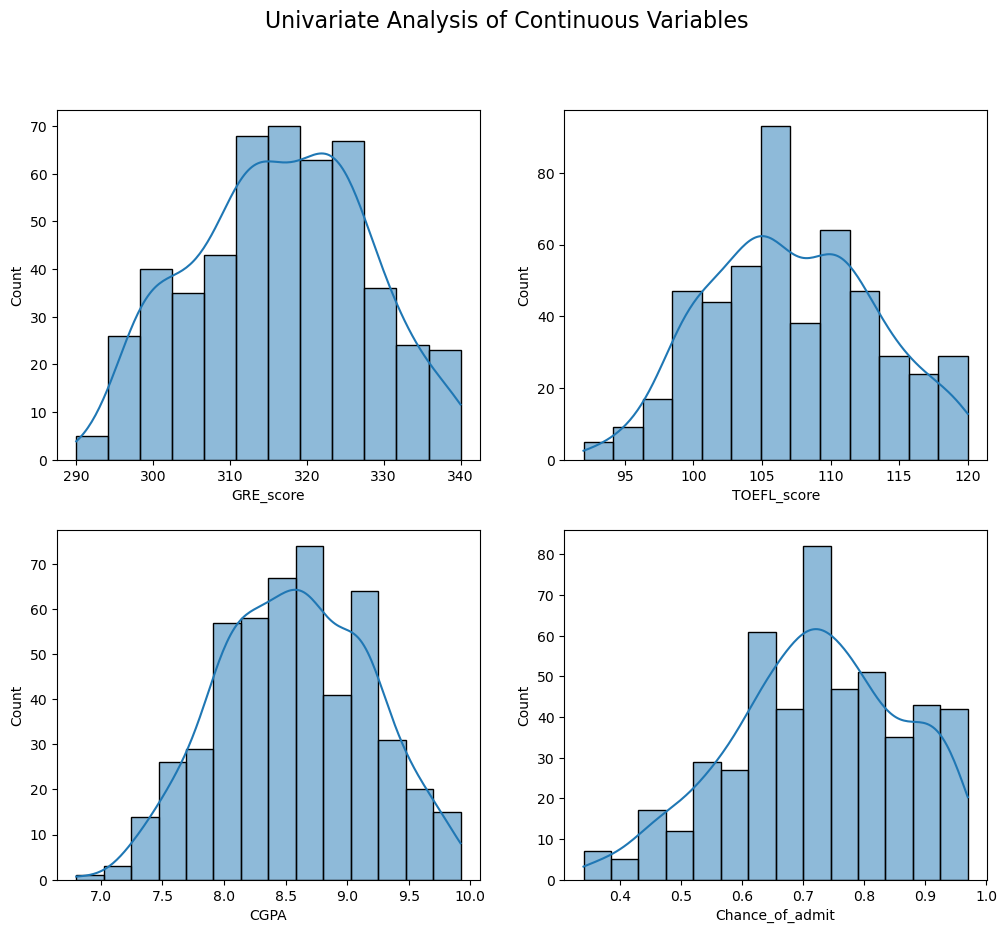

In [20]:
num_cols = ['GRE_score', 'TOEFL_score', 'CGPA', 'Chance_of_admit']

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot each variable in the appropriate subplot
for i, column in enumerate(num_cols):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], ax=ax[row, col], kde=True)
    #ax[row, col].set_title(column)


plt.suptitle("Univariate Analysis of Continuous Variables", fontsize=16)
plt.show()

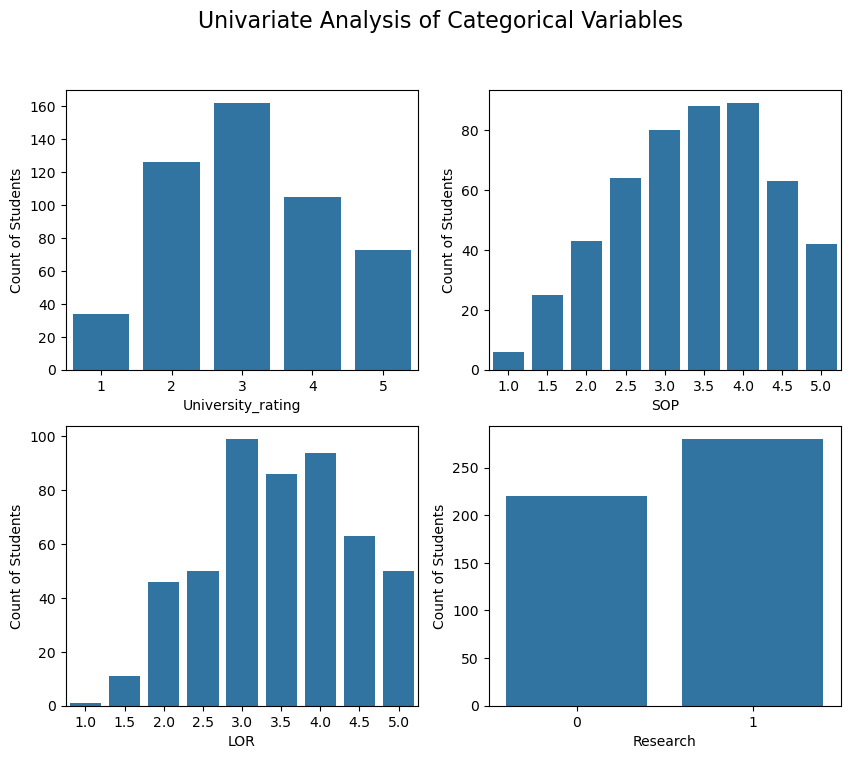

In [21]:
cat_cols= ['University_rating', 'SOP', 'LOR', 'Research']
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.suptitle("Univariate Analysis of Categorical Variables", fontsize=16)
plt.show()

It can be observed that the most frequent value of categorical features is as following:

- University Rating: 3
- SOP: 3.5 & 4
- LOR: 3
- Research: True

### Bivariate Analysis of Categorical Variables

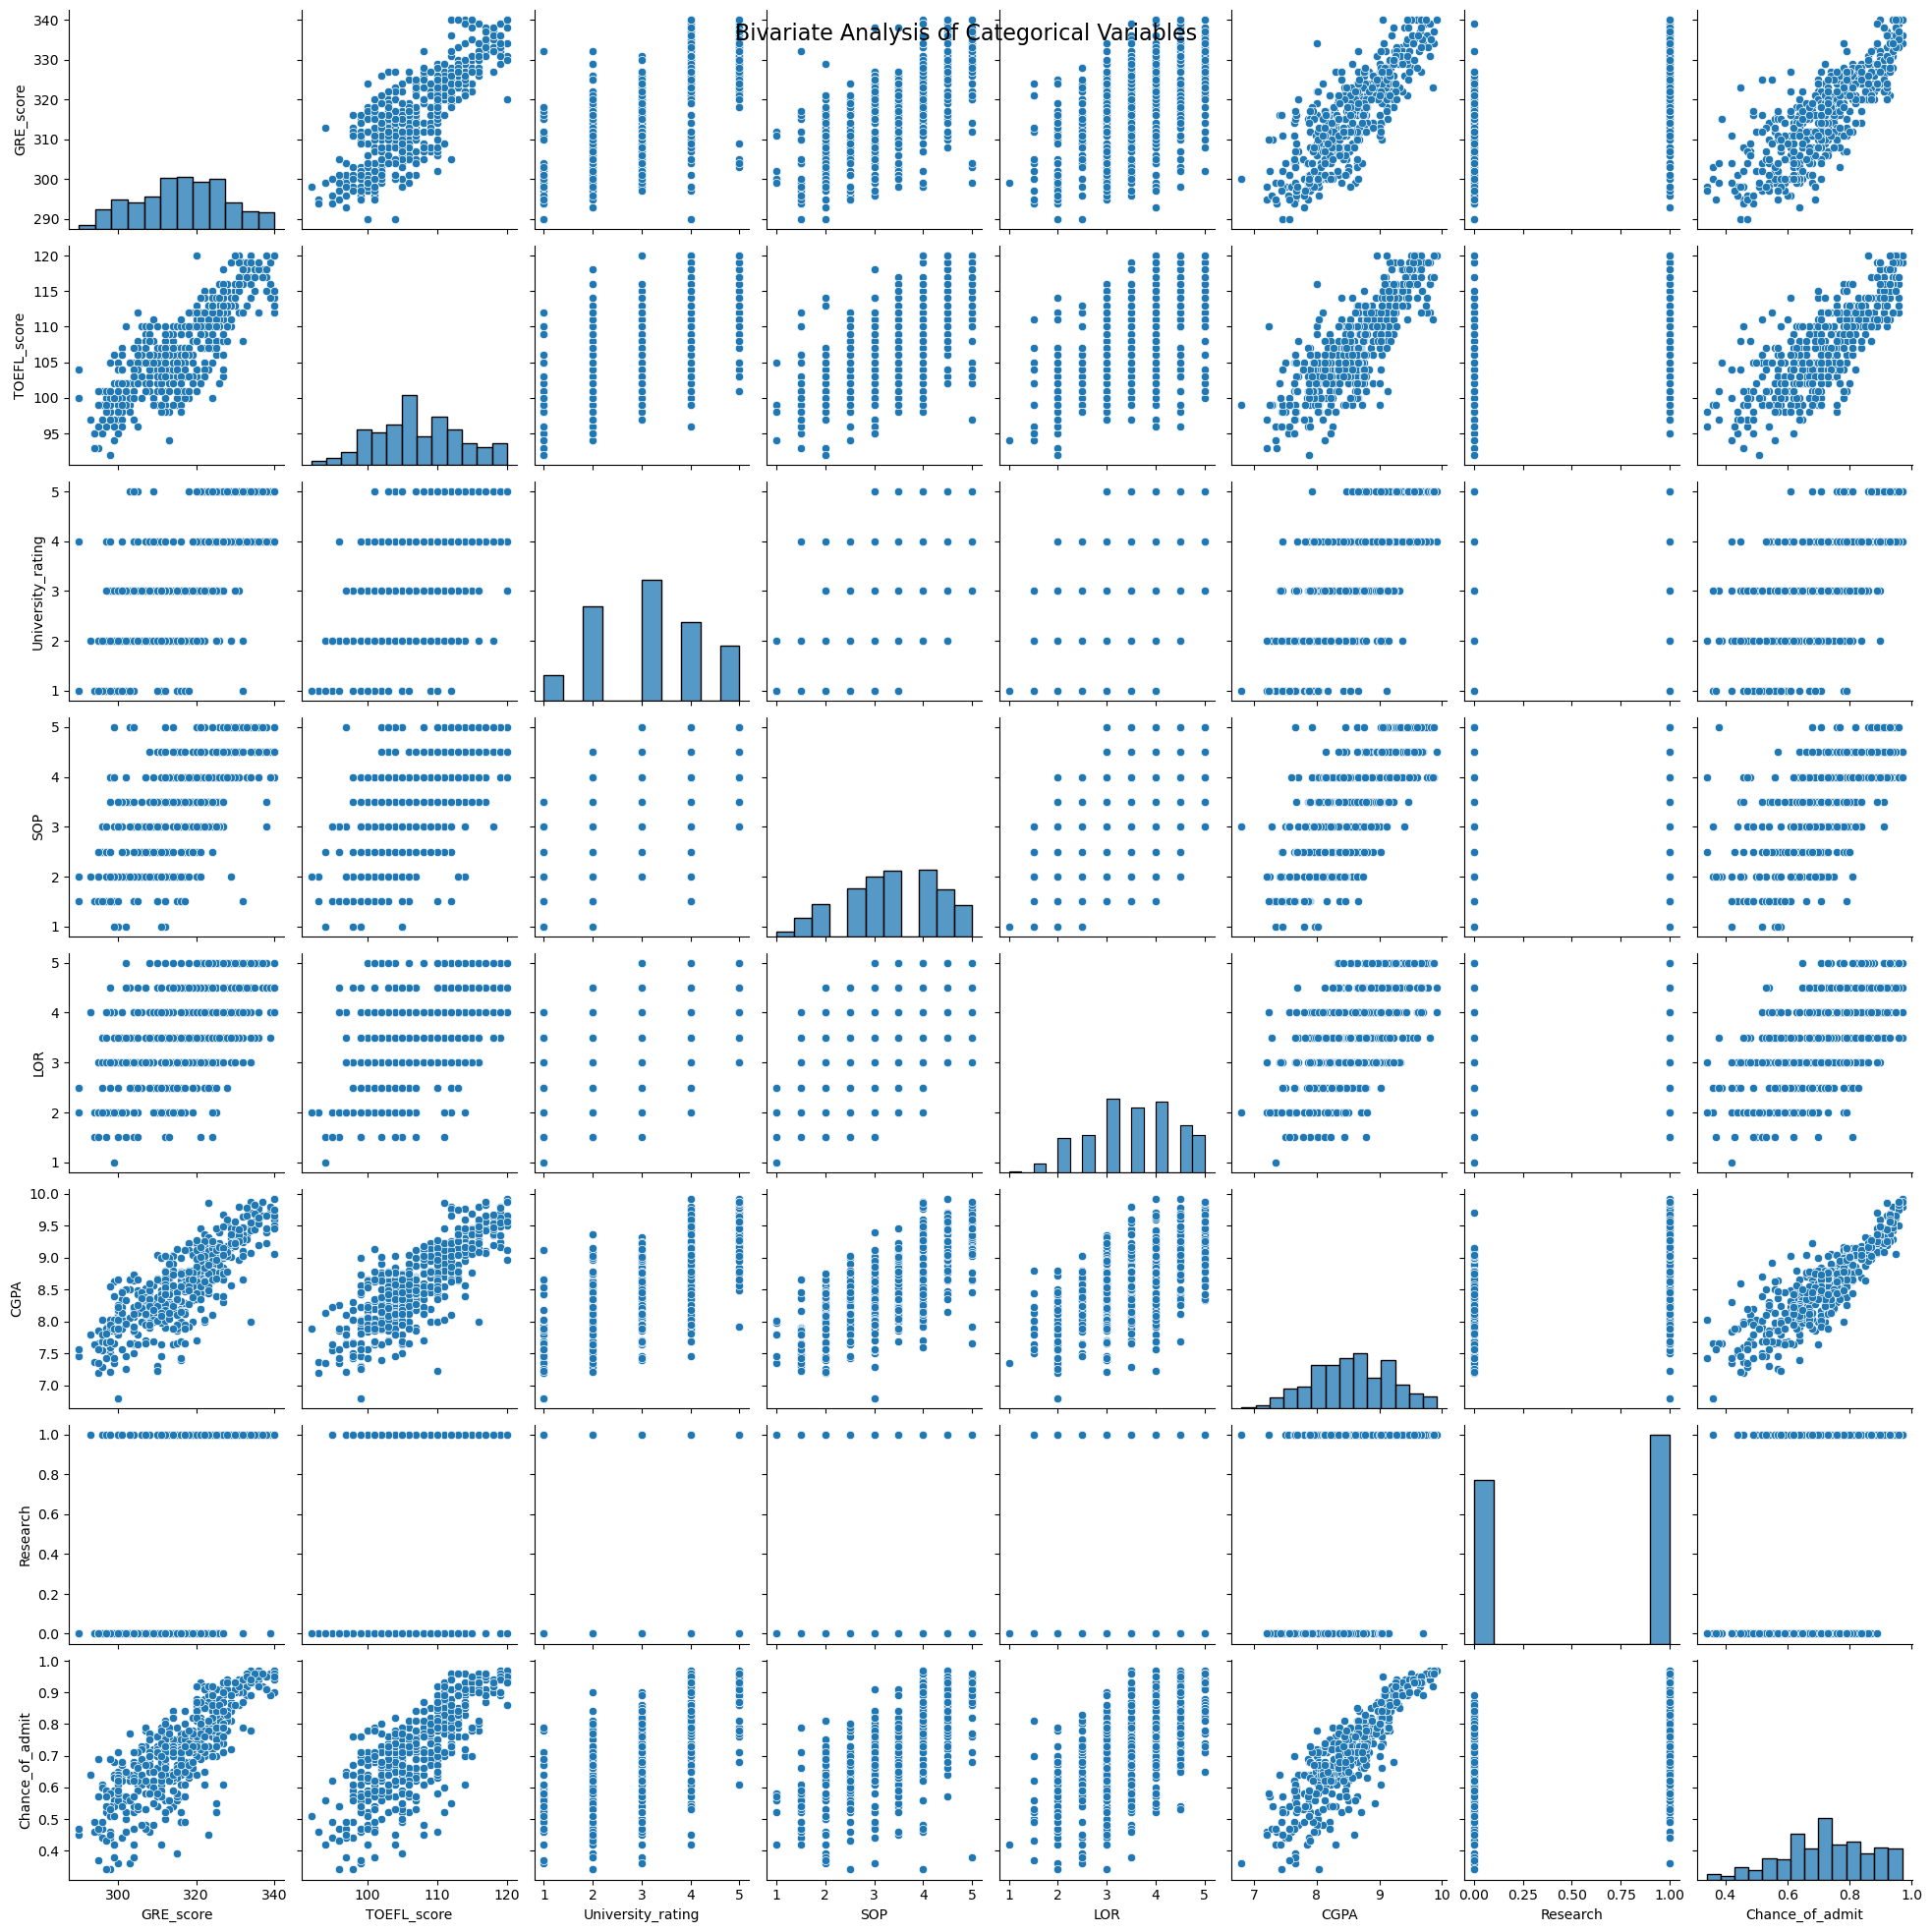

In [24]:
sns.pairplot(df)
plt.suptitle("Bivariate Analysis of Categorical Variables", fontsize=16)
plt.show()

- Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
- While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
- We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

### Multivariate Analysis:

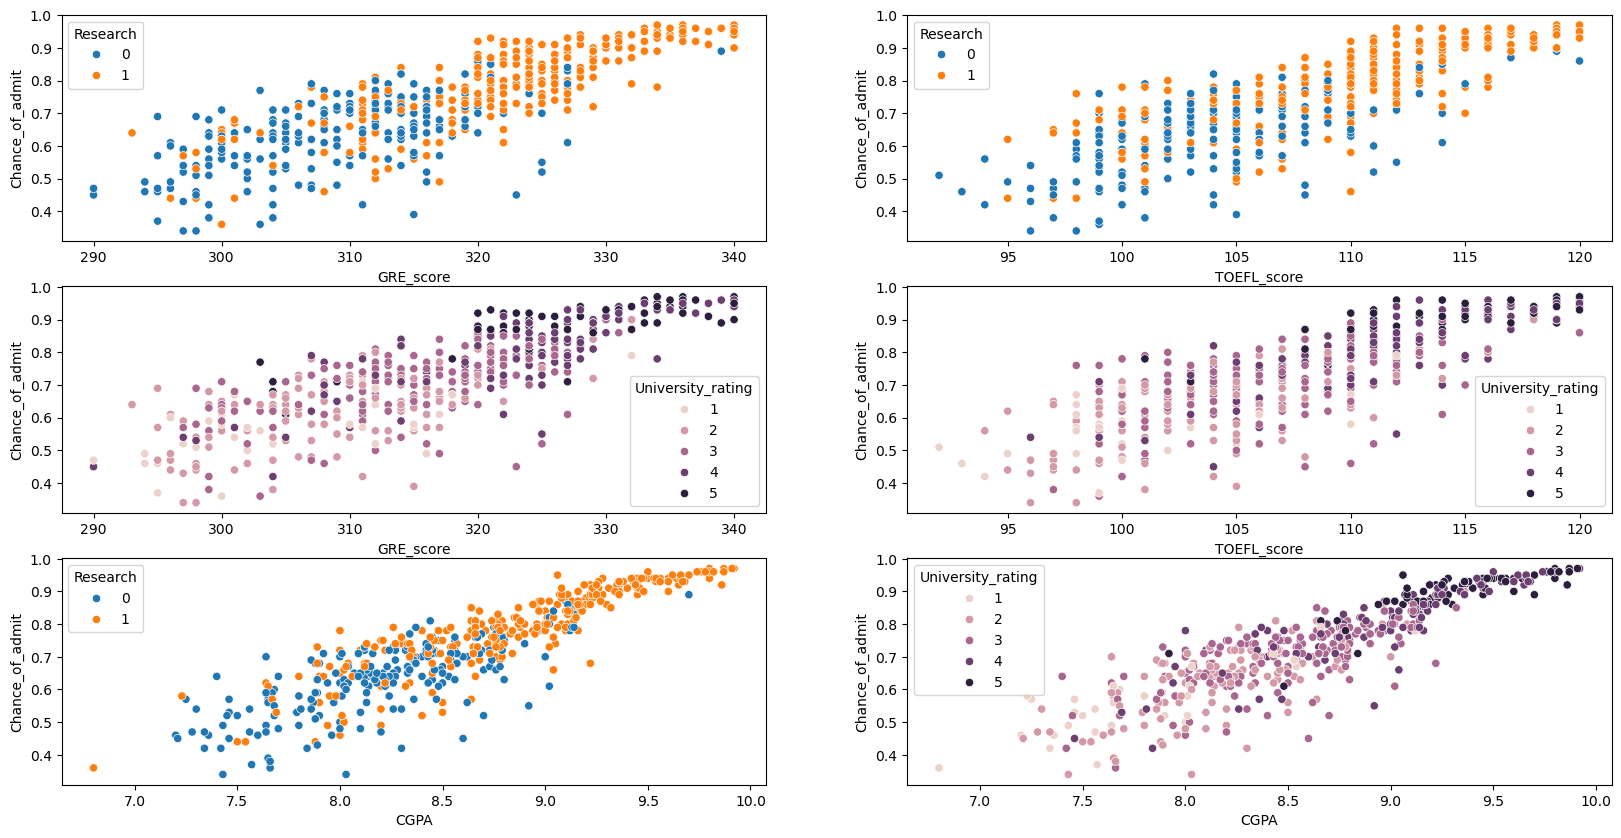

In [27]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.scatterplot(x=df['GRE_score'], y=df['Chance_of_admit'],hue=df['Research'], ax=ax[0,0])
sns.scatterplot(x=df['TOEFL_score'], y=df['Chance_of_admit'],hue=df['Research'], ax=ax[0,1])
sns.scatterplot(x=df['GRE_score'], y=df['Chance_of_admit'], hue=df['University_rating'], ax=ax[1,0])
sns.scatterplot(x=df['TOEFL_score'], y=df['Chance_of_admit'],hue=df['University_rating'], ax=ax[1,1])
sns.scatterplot(x=df['CGPA'], y=df['Chance_of_admit'], hue=df['Research'],ax=ax[2,0])
sns.scatterplot(x=df['CGPA'], y=df['Chance_of_admit'], hue=df['University_rating'], ax=ax[2,1])
plt.show()

- GRE Scores and Research: There’s a positive correlation between GRE Scores and Research. Higher GRE Scores tend to be associated with higher levels of research.
- TOEFL Scores and Research: Similarly, there’s a positive trend between TOEFL Scores and Research, indicating that higher TOEFL Scores are linked with higher research levels.
- University Ratings and GRE Scores: Higher-rated universities tend to have students with higher GRE Scores.
- University Ratings and TOEFL Scores: There’s a positive correlation between University Ratings and TOEFL Scores, suggesting that higher-rated universities have students with higher TOEFL Scores.

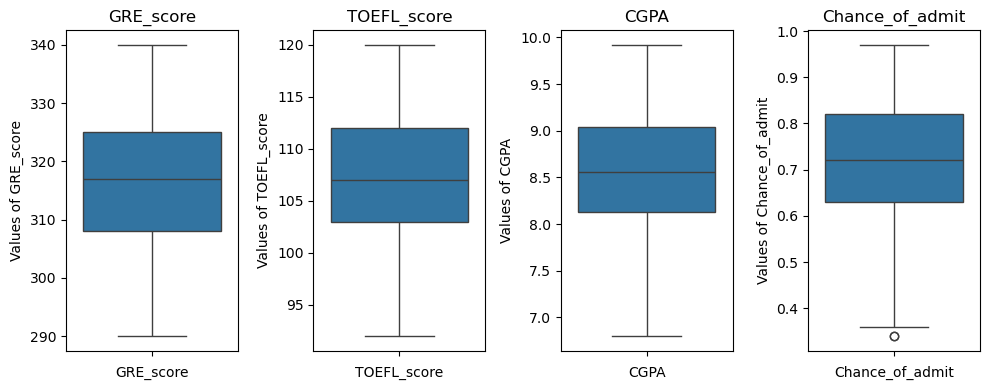

In [29]:
plt.figure(figsize=(10,4))
i=1

for col in num_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

- No outliers in GRE,TOEFL, CGPA
- Admission_chance has very few number of outliers so no need to remove them.

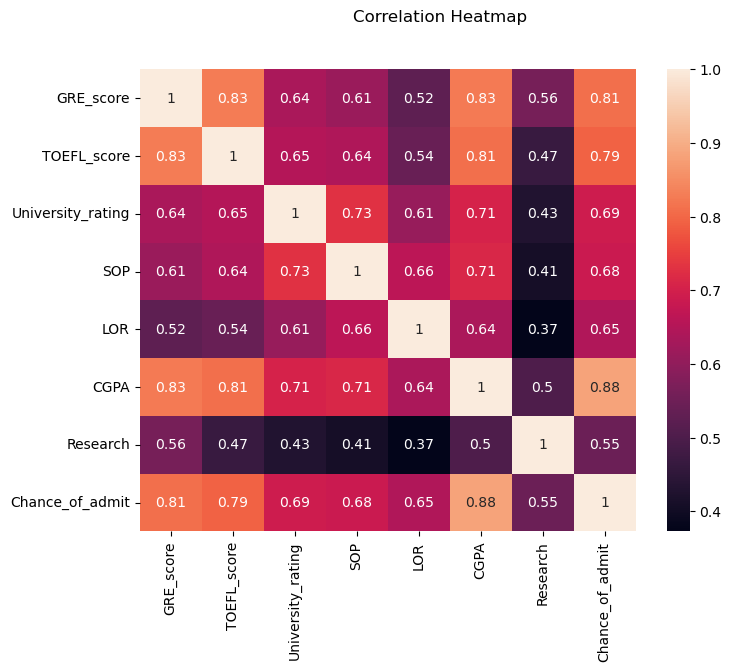

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.suptitle("Correlation Heatmap")
plt.show()

- Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit
- Infact, they are also highly correlated amongst themselves

In [34]:
df.rename(columns={'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score',
            'University Rating':'University_rating','LOR ':'LOR',
            'Chance of Admit ':'Chance_of_admit'},inplace=True)

In [35]:
x = df.drop(columns='Chance_of_admit')
y = df['Chance_of_admit']

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Scaling

In [38]:
label_encoders = {}

# Loop through each categorical column and initialize the label encoder
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
for col in cat_cols:
  label_encoders[col].fit(x[col])

In [39]:
#Transforming categorical columns in the train and test data
for col in cat_cols:
  x_train[col] = label_encoders[col].transform(x_train[col])
  x_test[col] = label_encoders[col].transform(x_test[col])

In [40]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head(10)

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research
249,321,111,2,5,6,8.83,1
433,316,111,3,6,8,8.54,0
19,303,102,2,5,4,8.50,0
322,314,107,1,3,6,8.27,0
332,308,106,2,5,3,8.21,1
56,316,102,2,2,4,7.40,0
301,319,108,1,3,4,8.76,0
229,324,111,3,4,4,9.01,1
331,311,105,1,4,2,8.12,1
132,309,105,4,5,5,8.56,0


In [41]:
scaler_x = MinMaxScaler()
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [42]:
all_cols = x_train.columns

In [43]:
x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

In [44]:
x_test.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research
361,0.88,0.857143,0.75,0.750,0.625,0.878205,1.0
73,0.48,0.571429,0.75,0.875,0.750,0.717949,1.0
374,0.50,0.464286,0.25,0.250,0.375,0.272436,0.0
155,0.44,0.607143,0.50,0.500,0.500,0.605769,0.0
104,0.72,0.714286,0.50,0.625,0.500,0.721154,1.0


### Linear Regression: 

In [46]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [48]:
print(f'The coefficient for linear regression: {model.coef_}')
print(f'The intercept for linear regression: {model.intercept_}')

The coefficient for linear regression: [0.12172192 0.08388445 0.01027519 0.00725476 0.06895193 0.3510845
 0.02402679]
The intercept for linear regression: 0.34696505839455805


In [49]:
y_predict = model.predict(x_test)

In [50]:
y_predict

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [51]:
# Evaluating the model using multiple loss functions
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

### Training the model

In [53]:
model_evaluation(y_train.values, y_pred_train, model)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


### Testing the model

In [55]:
model_evaluation(y_test.values, y_pred_test, model)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Since the loss scores for both training and test data are consistent, we can conclude that the model is not overfitting.
- The Mean Absolute Error (MAE) of 0.04 indicates that, on average, the absolute difference between the actual and predicted values for the chance of admission is 4%. 
- The Root Mean Squared Error (RMSE) of 0.06 signifies that, on average, the square root of the squared differences between the actual and predicted values is 6%.
- An R² Score of 0.82 means our model explains 82% of the variance in the data. 
- The Adjusted R² further refines this by accounting for the number of features used, providing a more accurate measure of model performance.

In [57]:
# Model Coefficients
for feature,weight in zip(x_train.columns, model.coef_):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE_score: 0.12
Weight of TOEFL_score: 0.08
Weight of University_rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of CGPA: 0.35
Weight of Research: 0.02


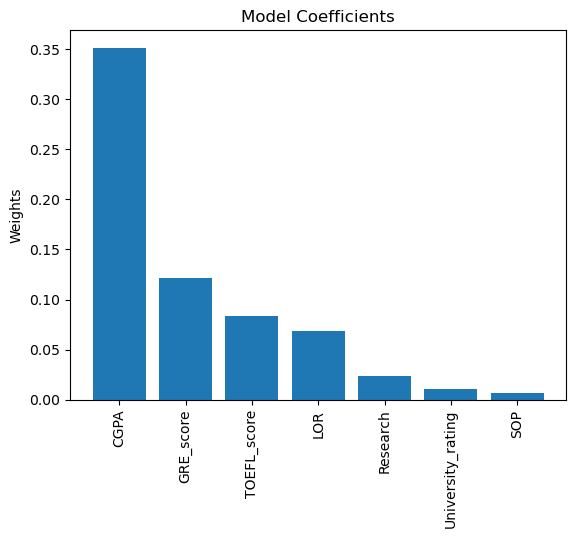

In [58]:
model_weights=list(zip(x_train.columns, model.coef_))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

- CGPA & GRE scores have the highest weight
- SOP, University rating, and research have the lowest weights

### Multicollinearity test:

### VIF: 

In [62]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE_score,31.185925
1,TOEFL_score,26.753950
2,University_rating,10.837374
3,SOP,18.864173
4,LOR,14.657099
5,CGPA,41.732265
6,Research,3.366187


We observe that nearly all variables, except for research, exhibit a high degree of collinearity. This was also evident from the correlation heatmap, which revealed a strong positive correlation among the GRE score, TOEFL score, and CGPA.

### Mean of Residuals:

In [65]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.0054536237176613


Since the mean of residuals is very close to 0, we can say that the model is unbiased

### Linearity of Variables:

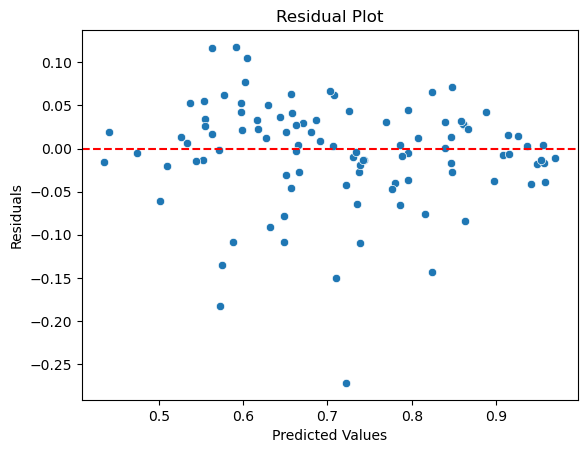

In [68]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Homoscedasticity:

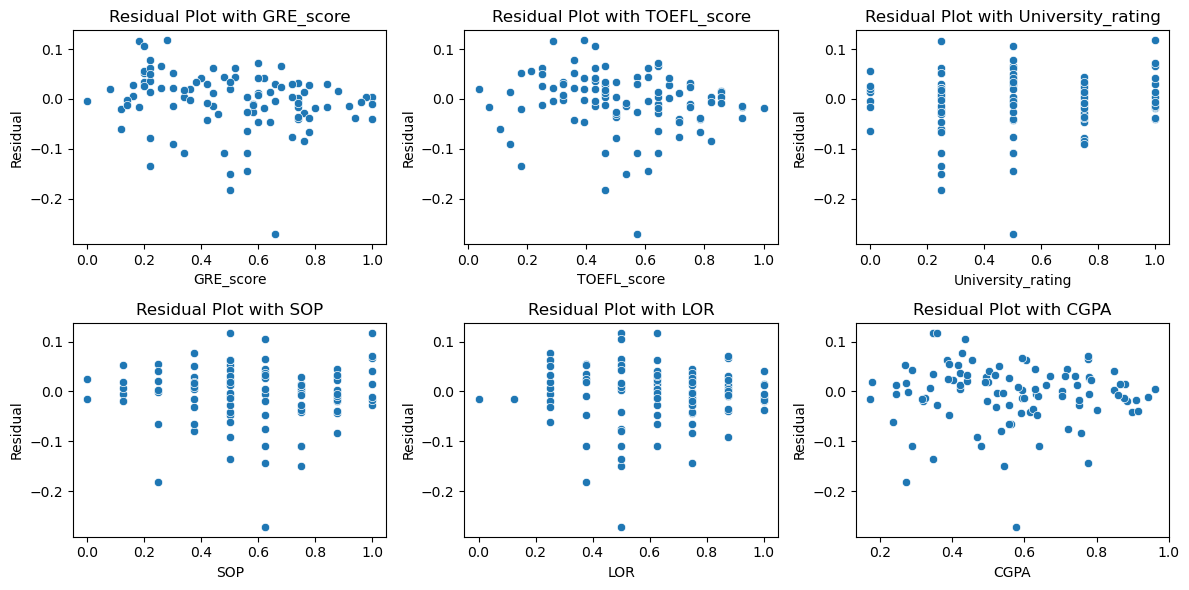

In [70]:
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show()

Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

### Normality of Residuals:

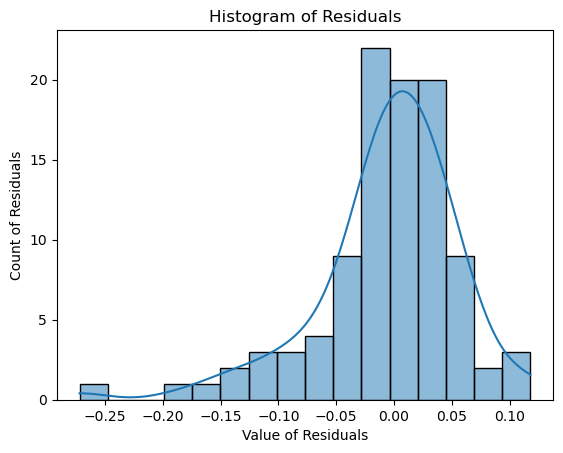

In [73]:
#Histogram of Residuals
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show()

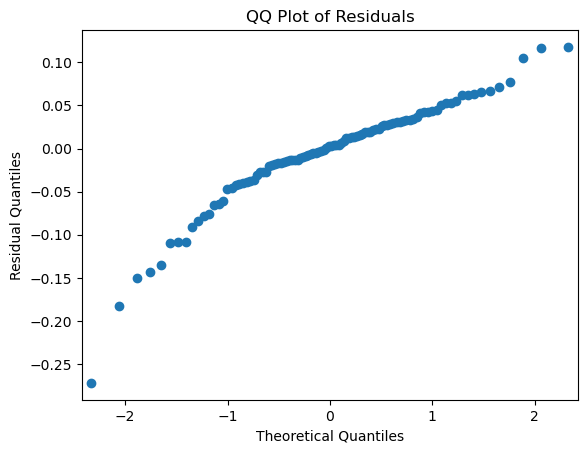

In [74]:
# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show()

The QQ plot shows that residuals are slightly deviating from the straight diagonal

### Lasso and Ridge Regression:

In [77]:
# Initialising instance of Ridge and Lasso classes
model_ridge = Ridge()
model_lasso = Lasso()

In [78]:
# Fitting the models to training data
model_ridge.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)

Lasso()

In [79]:
# Predicting values for train and test data

y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

In [80]:
# Evaluating Model Performance
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


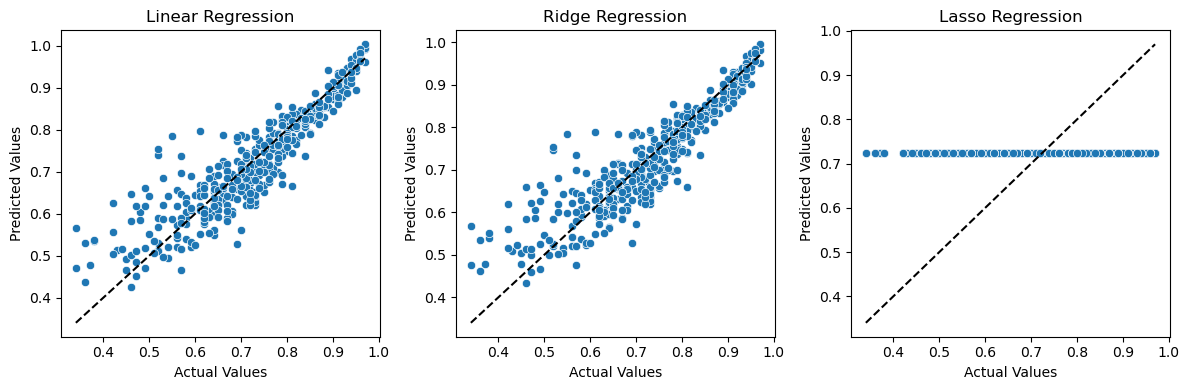

In [81]:
# Actual v/s Predicted values for training data

actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show()

We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

**Insights:**

- The target variable (chance of admit) is left-skewed.
- Exam scores (CGPA, GRE, TOEFL) show a strong positive correlation with the chance of admit and with each other.
- Categorical variables like university ranking, research, SOP quality, and LOR also positively impact the chance of admit.
- Model coefficients indicate that CGPA is the most significant predictor, while SOP and university rating are the least significant.
- Both Linear and Ridge Regression models capture up to 82% of the variance in the target variable. High collinearity among predictors limits the potential for better results.
- Besides multicollinearity, the predictor variables meet Linear Regression assumptions: residuals have a mean close to 0, linearity, normality, and homoscedasticity are satisfied.

**Recommendations:**

- To improve predictions, consider adding more independent features, as the current exam scores are highly correlated.
- Potential additional variables include work experience, internships, mock interview performance, extracurricular activities, or diversity factors.